In [25]:
# Data loading
import pandas as pd
df = pd.read_csv('/sales_data.csv')

In [26]:
# Data Inspection
print(df.head())
print(df.info())
print(df.describe())

         Date  Product_ID Product_Name     Category  Sales_Amount  \
0  2024-04-03        1002     Gadget B  Electronics        217.58   
1  2024-03-09        1014  Doohickey N   Home Goods        218.86   
2  2023-10-13        1007     Gadget G         Toys        234.86   
3  2023-09-22        1014  Doohickey N   Home Goods        152.96   
4  2023-12-09        1012     Gadget L  Electronics        212.50   

   Quantity_Sold Store_Location  Customer_Age  
0              1        Chicago            64  
1              5        Houston            47  
2              1        Chicago            28  
3              4       New York            26  
4              3        Chicago            41  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Product_ID      1000 non-null   int64  
 2   Product

In [27]:
# Data Cleaning
df.isnull().sum()  # Check for missing values
df.dropna(inplace=True) #Remove rows with missing values

In [28]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df['Customer_Age'] = df['Customer_Age'].astype(int)  # Convert to integer
df.drop_duplicates(inplace=True)


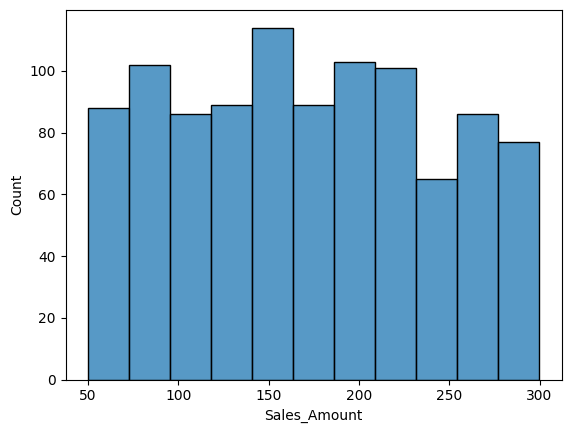

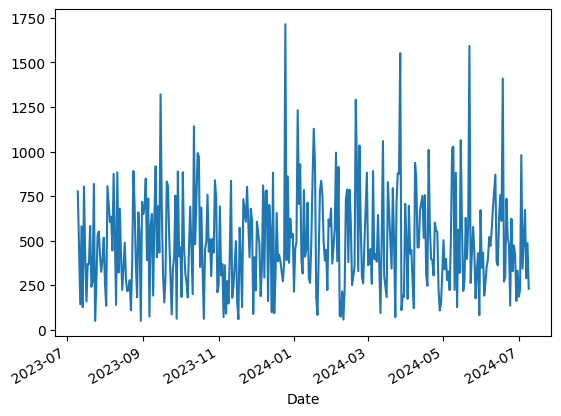

In [29]:
# Data Exploration

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize sales amount distribution
sns.histplot(df['Sales_Amount'])
plt.show()

# Visualize sales trends over time
df.groupby('Date')['Sales_Amount'].sum().plot()
plt.show()


In [30]:
# Data Validation
assert df['Sales_Amount'].min() >= 0, "Sales amount should be non-negative"
assert df['Customer_Age'].between(18, 65).all(), "Customer age should be between 18 and 65"

In [31]:
df.to_csv('cleaned_sales_data.csv', index=False)


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

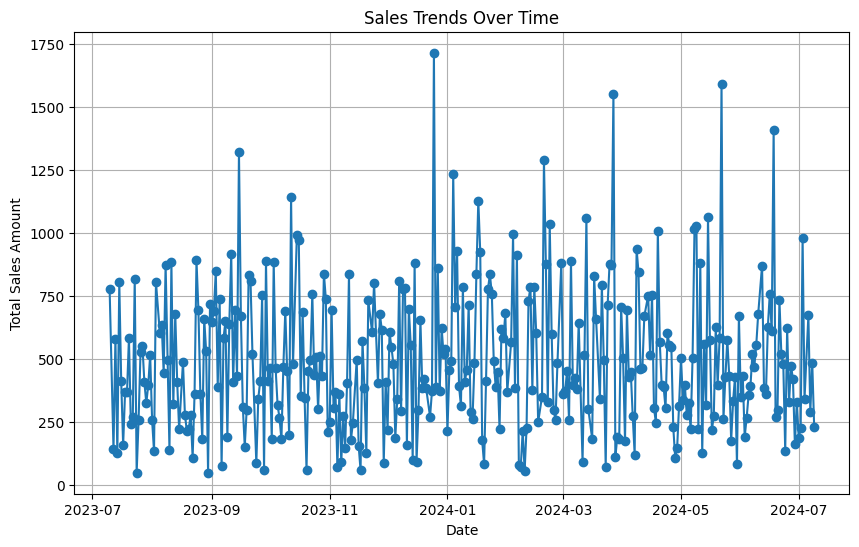

In [33]:
df = pd.read_csv('/sales_data.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date and sum Sales_Amount
time_series = df.groupby('Date')['Sales_Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_series['Date'], time_series['Sales_Amount'], marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()


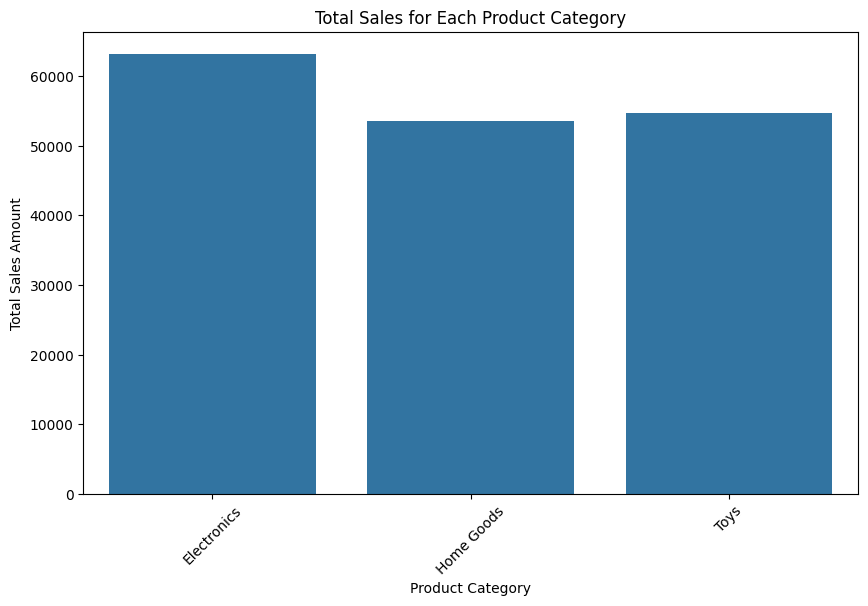

In [34]:
# Bar Chart Showing Total Sales for Each Product Category

import seaborn as sns

# Group by Category and sum Sales_Amount
category_sales = df.groupby('Category')['Sales_Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales_Amount', data=category_sales)
plt.title('Total Sales for Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

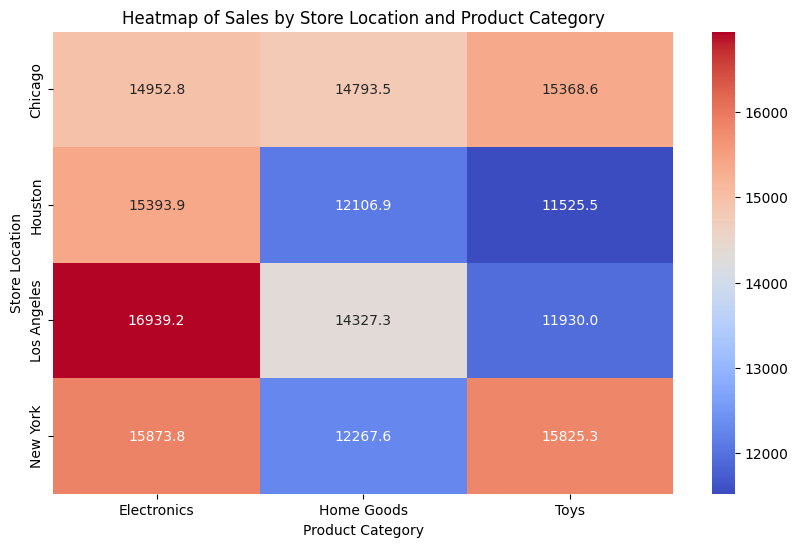

In [35]:
# Heatmap of Sales by Store Location and Product Category

# Pivot table for heatmap
heatmap_data = df.pivot_table(values='Sales_Amount', index='Store_Location', columns='Category', aggfunc='sum')

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Heatmap of Sales by Store Location and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Store Location')
plt.show()


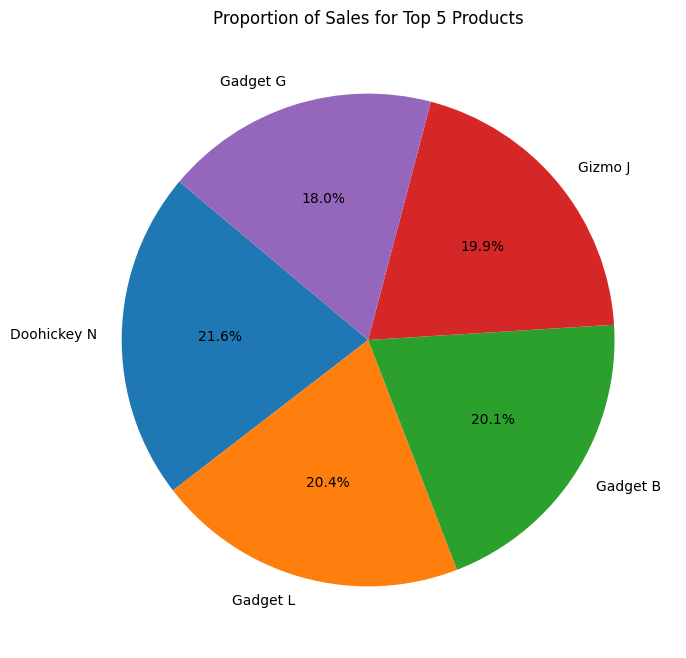

In [36]:
# Pie Chart Displaying the Proportion of Sales for the Top 5 Products

# Group by Product_Name and sum Sales_Amount
product_sales = df.groupby('Product_Name')['Sales_Amount'].sum().reset_index()

# Get top 5 products by sales
top_5_products = product_sales.nlargest(5, 'Sales_Amount')

# Plot
plt.figure(figsize=(8, 8))
plt.pie(top_5_products['Sales_Amount'], labels=top_5_products['Product_Name'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sales for Top 5 Products')
plt.show()


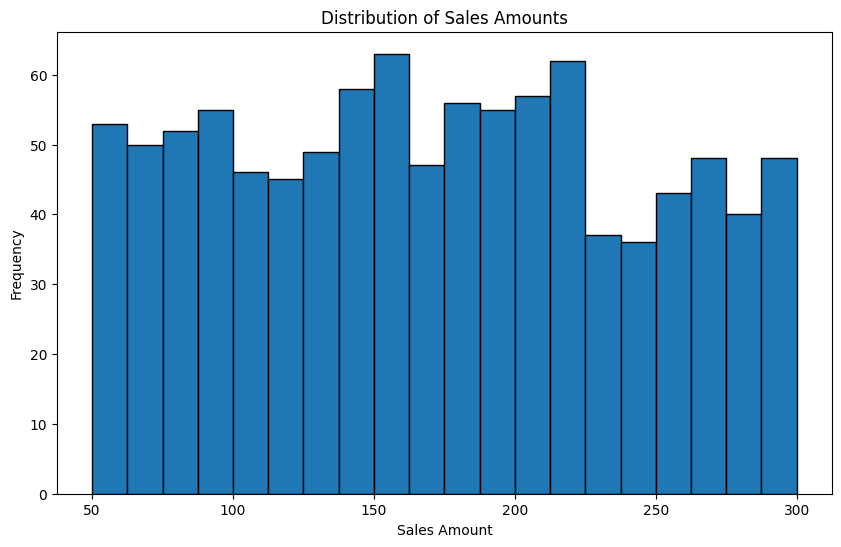

In [37]:
# Histogram Showing the Distribution of Sales Amounts

# Plot
plt.figure(figsize=(10, 6))
plt.hist(df['Sales_Amount'], bins=20, edgecolor='k')
plt.title('Distribution of Sales Amounts')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()
